In [2]:
import pandas as pd

In [3]:
security_incidents = pd.read_csv("../data/security_incidents.csv")

### Line graph showing total incidents by year 

In [4]:
import matplotlib.pyplot as plt

In [5]:
incidents_per_year_no_2025_df = security_incidents[security_incidents['Year'] < 2025]
incidents_per_year = incidents_per_year_no_2025_df.groupby('Year').size()

Dont include 2025 but do mention that so far in 2025 there are 47 incidents

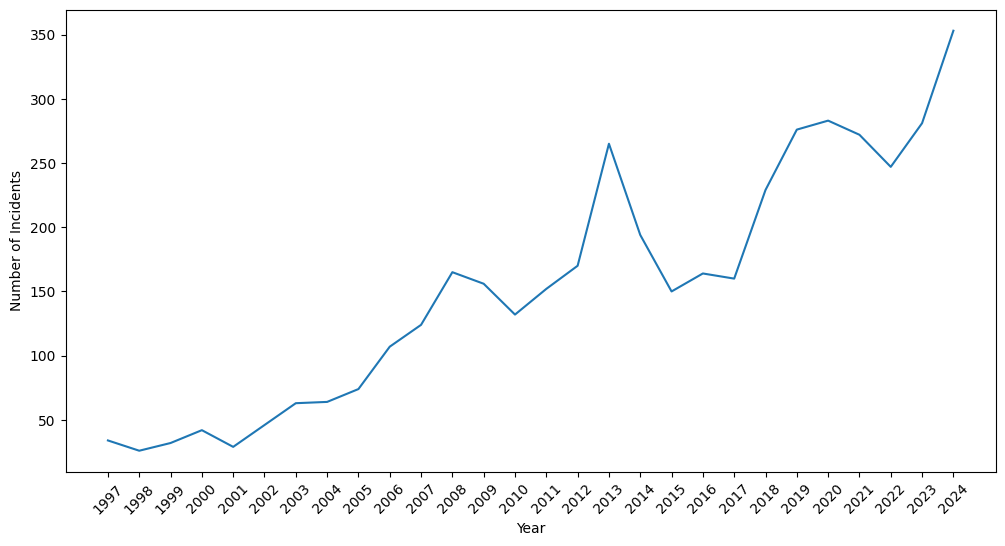

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(incidents_per_year.index, incidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(incidents_per_year.index, rotation=45)  
plt.show()

### Choropleth map 

In [7]:
import plotly.express as px

In [8]:
#incidents_2024 = security_incidents[(2019 < security_incidents['Year']) & (security_incidents['Year'] < 2025)]
incidents_by_country = security_incidents.groupby('Country').size().reset_index(name='Total Incidents')

In [9]:
fig = px.choropleth(
    incidents_by_country,
    locations="Country",
    locationmode="country names",
    color="Total Incidents",
    color_continuous_scale="Reds",
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

have a slider to show differetn year + all years 

### National vs International 

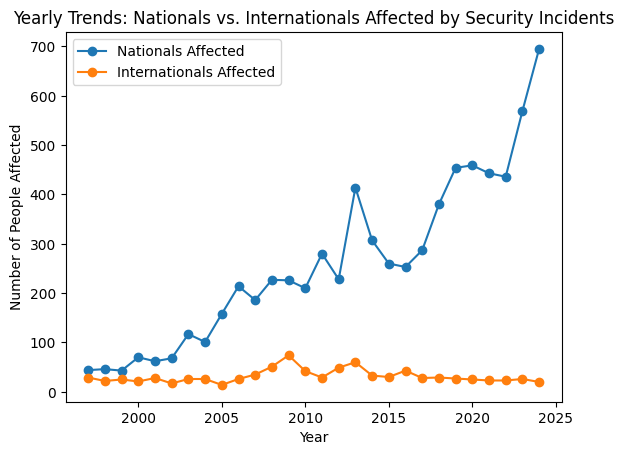

In [12]:
national_vs_international = security_incidents.groupby('Year')[['Total nationals', 'Total internationals']].sum().reset_index()
national_vs_international = national_vs_international[national_vs_international['Year'] < 2025]


plt.figure()
plt.plot(national_vs_international['Year'], national_vs_international['Total nationals'], marker='o', label='Nationals Affected')
plt.plot(national_vs_international['Year'], national_vs_international['Total internationals'], marker='o', label='Internationals Affected')

plt.title('Yearly Trends: Nationals vs. Internationals Affected by Security Incidents')
plt.xlabel('Year')
plt.ylabel('Number of People Affected')
plt.legend()
plt.show()

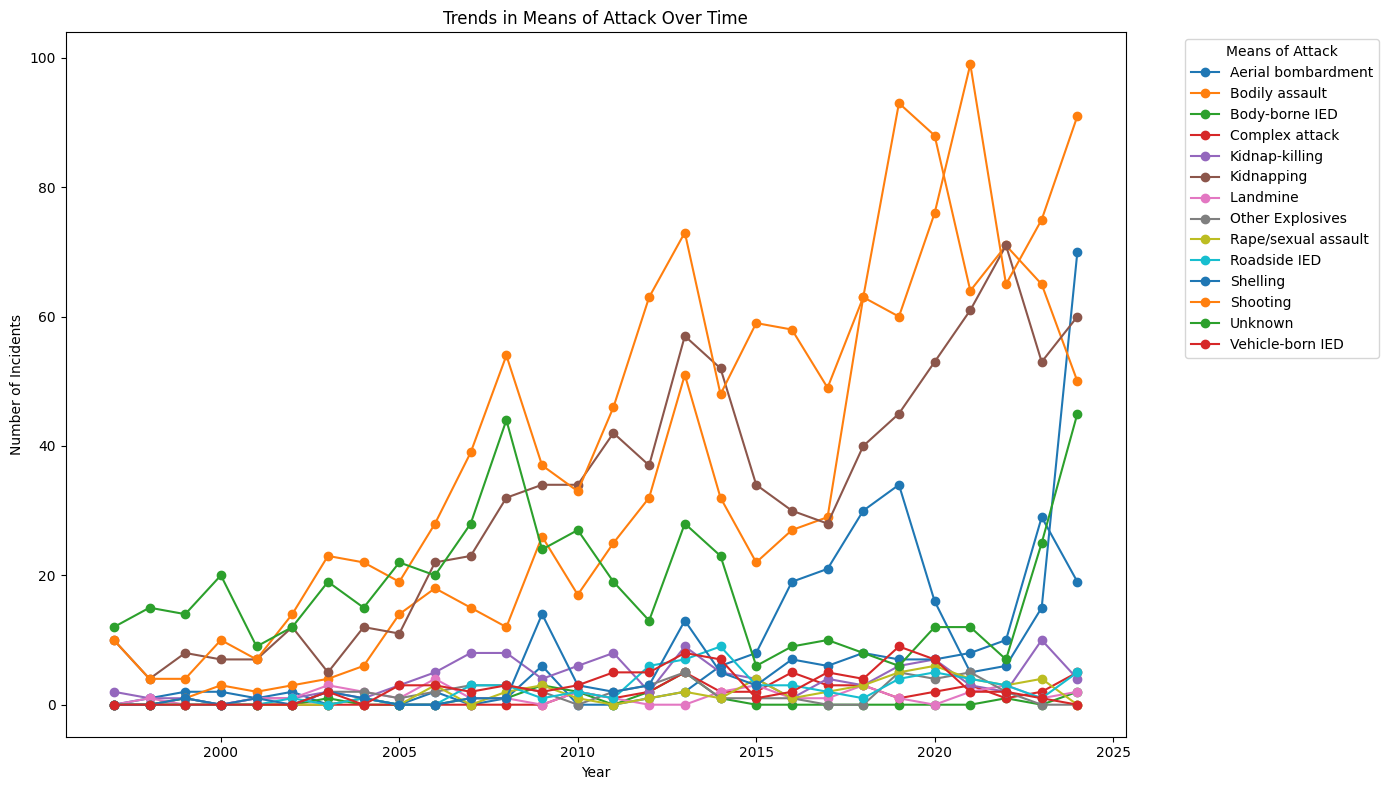

In [16]:
attack_trends= security_incidents[security_incidents['Year'] < 2025]
attack_trends = attack_trends.groupby(['Year', 'Means of attack']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
for attack_type in attack_trends.columns:
    plt.plot(attack_trends.index, attack_trends[attack_type], marker='o', label=attack_type)

plt.title('Trends in Means of Attack Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Means of Attack', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Gender

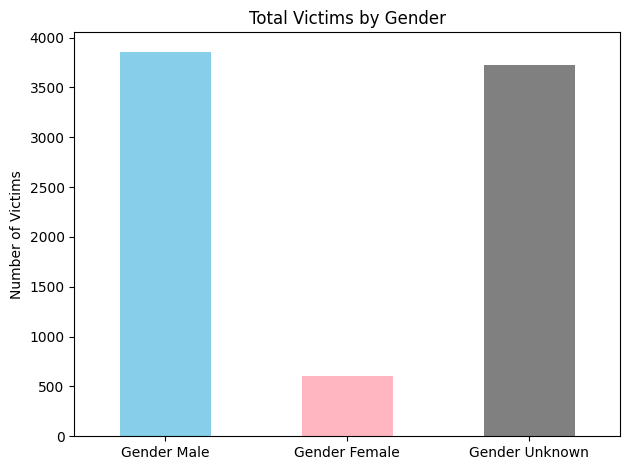

In [19]:
gender_totals = security_incidents[['Gender Male', 'Gender Female', 'Gender Unknown']].sum()

plt.figure()
gender_totals.plot(kind='bar', color=['skyblue', 'lightpink', 'gray'])

plt.title('Total Victims by Gender')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

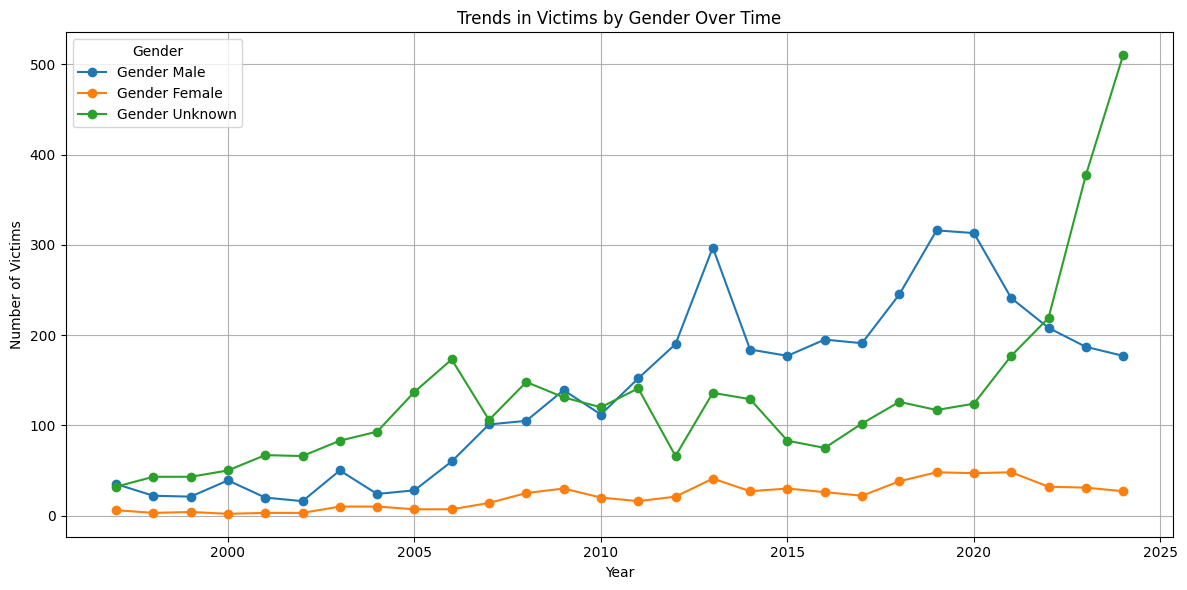

In [21]:
gender_over_time= security_incidents[security_incidents['Year'] < 2025]
gender_over_time = gender_over_time.groupby('Year')[['Gender Male', 'Gender Female', 'Gender Unknown']].sum().reset_index()

# Plot line chart for each gender category
plt.figure(figsize=(12, 6))
for gender in ['Gender Male', 'Gender Female', 'Gender Unknown']:
    plt.plot(gender_over_time['Year'], gender_over_time[gender], marker='o', label=gender)

plt.title('Trends in Victims by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

### Role

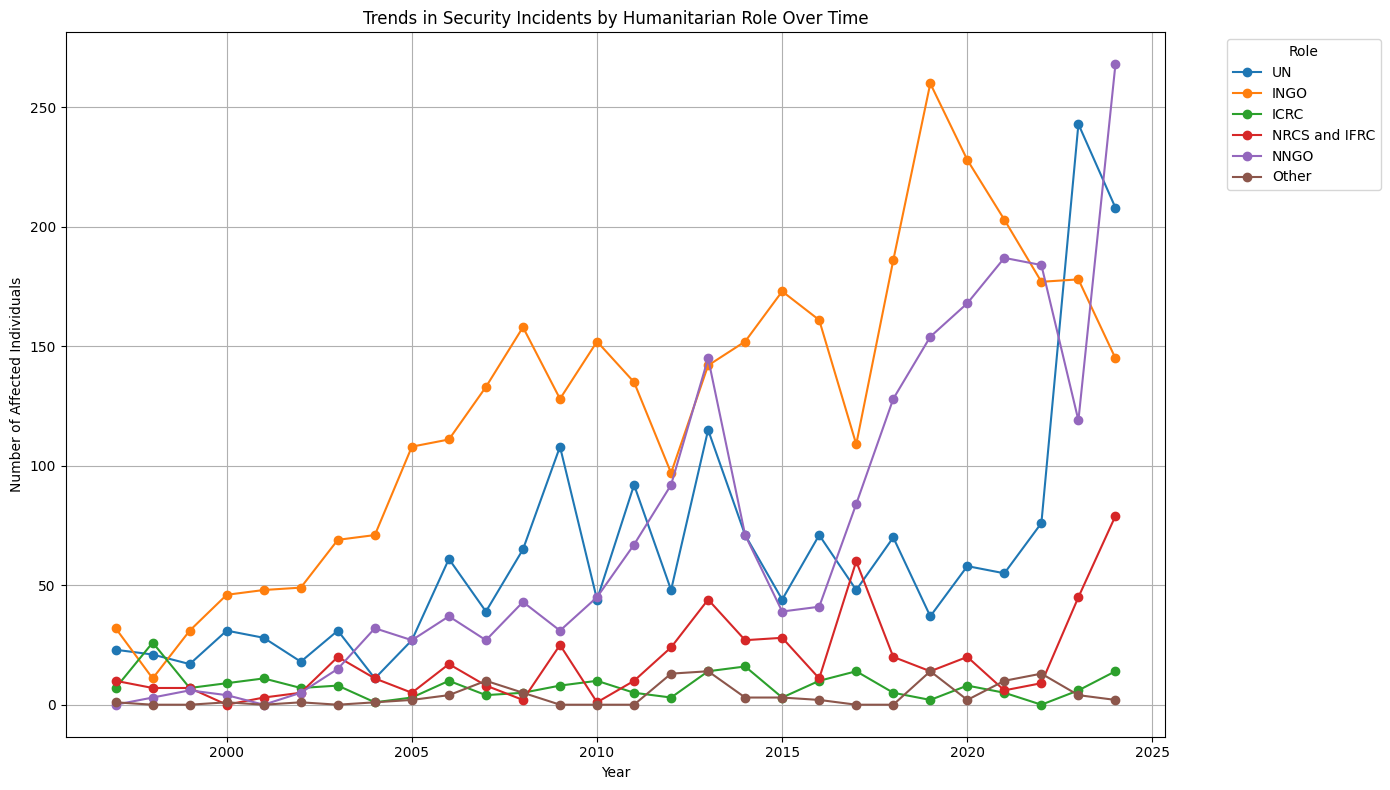

In [ ]:
roles_over_time= security_incidents[security_incidents['Year'] < 2025]
roles_over_time = roles_over_time.groupby('Year')[['UN', 'INGO', 'ICRC', 'NRCS and IFRC', 'NNGO', 'Other']].sum().reset_index()

# Plot a line chart for each role
plt.figure(figsize=(14, 8))
for role in ['UN', 'INGO', 'ICRC', 'NRCS and IFRC', 'NNGO', 'Other']:
    plt.plot(roles_over_time['Year'], roles_over_time[role], marker='o', label=role)

plt.title('Trends in Security Incidents by Humanitarian Role Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Affected Individuals')
plt.legend(title='Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Data Confidence 

In [22]:
security_incidents_cleaned = security_incidents[security_incidents['Verified'] != 'Pen'].copy()

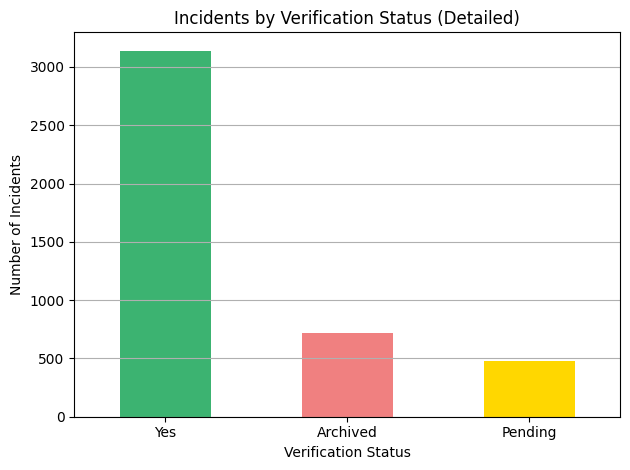

In [24]:
verification_separate = security_incidents_cleaned['Verified'].value_counts()

plt.figure()
verification_separate.plot(kind='bar', color=['mediumseagreen', 'lightcoral', 'gold'])
plt.title('Incidents by Verification Status (Detailed)')
plt.ylabel('Number of Incidents')
plt.xlabel('Verification Status')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Money

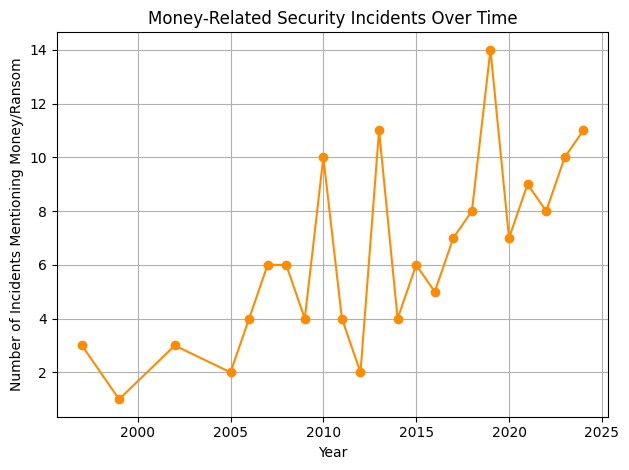

In [26]:
money_keywords = ['money', 'ransom', 'payment', 'paid', 'extortion', 'bribe', 'funds', 'demanded', 'ransomed']
money_related = security_incidents[security_incidents['Details'].str.contains('|'.join(money_keywords), case=False, na=False)]

money_trend = money_related.groupby('Year').size()

plt.figure()
plt.plot(money_trend.index, money_trend.values, marker='o', color='darkorange')
plt.title('Money-Related Security Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents Mentioning Money/Ransom')
plt.grid(True)
plt.tight_layout()
plt.show()